In [95]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy import optimize

import math  
import numpy as np
import pandas as pd

# SIR model

In [125]:
# Total population, N without china
N = 6.4 *(10**9)
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 1, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.6, 1/10

In [126]:
# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt


In [127]:
# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
# ret = odeint(deriv, y0, [i for i in range(1000)], args=(N, beta, gamma))
ret = odeint(deriv, y0, [i for i in range(1000)], args=(N, beta, gamma))

S, I, R = ret.T


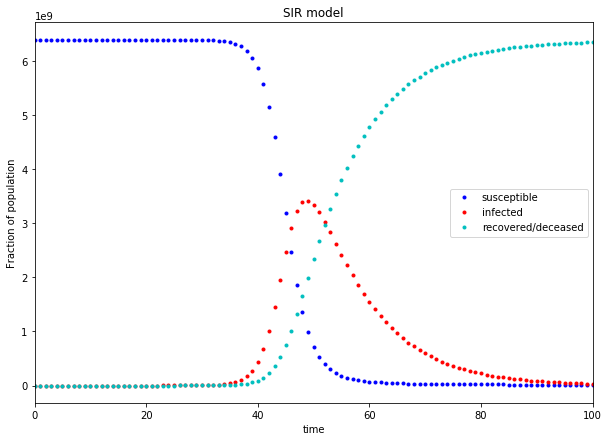

In [128]:
f = plt.figure(figsize=(10,7)) 
plt.plot(S, 'b.', label='susceptible');
plt.plot(I, 'r.', label='infected');
plt.plot(R, 'c.', label='recovered/deceased');
plt.title("SIR model")
plt.xlabel("time", fontsize=10);
plt.ylabel("Fraction of population", fontsize=10);
plt.legend(loc='best')
plt.xlim(0,100)
plt.show()

In [253]:
df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,22,22,24,24,40,40,74,84,94,110
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,59,64,70,76,89,104,123,146,174,186
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,74,87,90,139,201,230,264,302,367,409
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,39,53,75,88,113,133,164,188,224,267
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,1,2,2,3,3,3,4,4


In [254]:
df = df.groupby(['Country/Region']).sum().reset_index(level=['Country/Region'])


In [255]:
df.head()

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20
0,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,...,22,22,24,24,40,40,74,84,94,110
1,Albania,41.1533,20.1683,0,0,0,0,0,0,0,...,59,64,70,76,89,104,123,146,174,186
2,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,...,74,87,90,139,201,230,264,302,367,409
3,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,...,39,53,75,88,113,133,164,188,224,267
4,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,...,0,0,1,2,2,3,3,3,4,4


In [256]:
dates = df.columns[4:]

df = df.melt(id_vars=[ 'Country/Region', 'Lat', 'Long'], 
                            value_vars=dates, var_name='Date', value_name='Confirmed')

In [257]:
df['Date'] =pd.to_datetime(df.Date)


In [258]:
df = df[df['Country/Region'] != 'China']
df_c = df
df.head()

,Country/Region,Lat,Long,Date,Confirmed
0,Afghanistan,33.0000,65.0000,2020-01-23,0
1,Albania,41.1533,20.1683,2020-01-23,0
2,Algeria,28.0339,1.6596,2020-01-23,0
3,Andorra,42.5063,1.5218,2020-01-23,0
4,Angola,-11.2027,17.8739,2020-01-23,0


In [259]:
df = df.groupby('Date')['Confirmed'].sum().reset_index()

In [260]:
df['Day num'] = np.arange(1, len(df)+1)
df.head()

,Date,Confirmed,Day num
0,2020-01-23,11,1
1,2020-01-24,21,2
2,2020-01-25,28,3
3,2020-01-26,43,4
4,2020-01-27,50,5


In [261]:
train = 0.85
index = math.ceil(train * len(df['Confirmed'].values))
index

56

In [262]:
Y = df['Confirmed'].values
X = x = df['Day num'].values

In [263]:
y = df['Confirmed'].values[:index]
x = df['Day num'].values[:index]

N = 6.4 *(10**9)
I0, R0 = y[0], 0
S0 = N - I0 - R0

In [264]:
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * y[0] * y[1] / N
    dIdt = beta * y[0] * y[1] / N - gamma * y[1]
    dRdt = gamma * y[1]
    return dSdt, dIdt, dRdt


In [265]:
def opt_ode(x, beta, gamma):
    return odeint(deriv, (S0, I0, R0), x, args=(N, beta, gamma))[:,1]



In [266]:
popt, pcov = optimize.curve_fit(opt_ode, x, y)

In [267]:
# pcov

In [268]:
fitted = opt_ode(x, *popt)

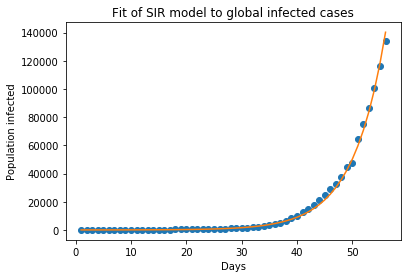

Optimal parameters: beta = 3.2442133542785143  and gamma =  3.072189049482556


In [269]:
plt.plot(x, y, 'o')
plt.plot(x, fitted)
plt.title("Fit of SIR model to global infected cases")
plt.ylabel("Population infected")
plt.xlabel("Days")
plt.show()
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])

In [270]:
beta, gamma = popt[0], popt[1]

In [271]:
# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt


In [272]:
y0 = S0, I0, R0
ret = odeint(deriv, y0, [i for i in range(150)], args=(N, beta, gamma))

S, I, R = ret.T


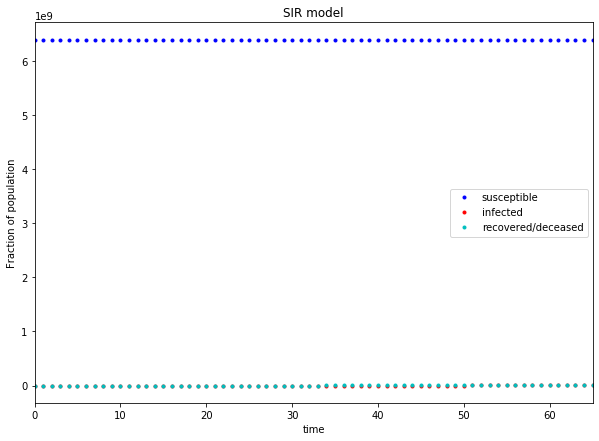

In [273]:
f = plt.figure(figsize=(10,7)) 
plt.plot(S, 'b.', label='susceptible');
plt.plot(I, 'r.', label='infected');
plt.plot(R, 'c.', label='recovered/deceased');
plt.title("SIR model")
plt.xlabel("time", fontsize=10);
plt.ylabel("Fraction of population", fontsize=10);
plt.legend(loc='best')
plt.xlim(0,len(X))
plt.show()

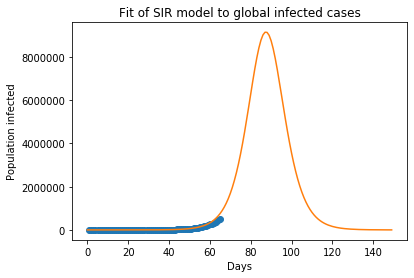

In [274]:
plt.plot(X, Y, 'o')
plt.plot([i for i in range(150)], I)
plt.title("Fit of SIR model to global infected cases")
plt.ylabel("Population infected")
plt.xlabel("Days")
plt.show()

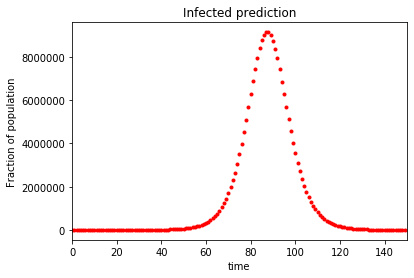

In [275]:
plt.plot(I, 'r.', label='infected');
plt.title("Infected prediction")
plt.xlabel("time");
plt.ylabel("Fraction of population");
plt.xlim(0,150)
plt.show()

In [276]:
max(I)

9147207.68430039

In [277]:
max(df['Confirmed'].values)

511394

# Analysing each country individualy

In [278]:
pop = pd.read_csv('datasets\population_by_country_2020.csv')
pop.head()

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,China,1439323776,0.39%,5540090,153,9388211,-348399.0,1.7,38,61%,18.47%
1,India,1380004385,0.99%,13586631,464,2973190,-532687.0,2.2,28,35%,17.70%
2,United States,331002651,0.59%,1937734,36,9147420,954806.0,1.8,38,83%,4.25%
3,Indonesia,273523615,1.07%,2898047,151,1811570,-98955.0,2.3,30,56%,3.51%
4,Pakistan,220892340,2.00%,4327022,287,770880,-233379.0,3.6,23,35%,2.83%


In [279]:
pop = pop[['Country (or dependency)', 'Population (2020)']].rename(columns = {'Country (or dependency)':'Country/Region',
                  'Population (2020)': 'Population'})

In [252]:
pop.head()

,Country/Region,Population
0,China,1439323776
1,India,1380004385
2,United States,331002651
3,Indonesia,273523615
4,Pakistan,220892340


In [280]:
df_c.head()

,Country/Region,Lat,Long,Date,Confirmed
0,Afghanistan,33.0000,65.0000,2020-01-23,0
1,Albania,41.1533,20.1683,2020-01-23,0
2,Algeria,28.0339,1.6596,2020-01-23,0
3,Andorra,42.5063,1.5218,2020-01-23,0
4,Angola,-11.2027,17.8739,2020-01-23,0


In [304]:
df_c = df_c.replace('US', 'United States').replace('Korea, South', 'South Korea')

In [306]:
countries = list(set(df_c['Country/Region'].values).intersection(set(pop['Country/Region'].values)))
# len(countries)

In [329]:
df_c[df_c['Country/Region'] == 'Italy']

,Country/Region,Lat,Long,Date,Confirmed
82,Italy,43.0,12.0,2020-01-23,0
258,Italy,43.0,12.0,2020-01-24,0
434,Italy,43.0,12.0,2020-01-25,0
610,Italy,43.0,12.0,2020-01-26,0
786,Italy,43.0,12.0,2020-01-27,0
...,...,...,...,...,...
10642,Italy,43.0,12.0,2020-03-23,63927
10818,Italy,43.0,12.0,2020-03-24,69176
10994,Italy,43.0,12.0,2020-03-25,74386
11170,Italy,43.0,12.0,2020-03-26,80589


In [346]:
N = int(pop[pop['Country/Region'] == countries[2]]['Population'])

In [347]:
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * y[0] * y[1] / N
    dIdt = beta * y[0] * y[1] / N - gamma * y[1]
    dRdt = gamma * y[1]
    return dSdt, dIdt, dRdt

def opt_ode(x, beta, gamma):
    return odeint(deriv, (S0, I0, R0), x, args=(N, beta, gamma))[:,1]

def find_opt(df_opt, pop):
    
    df_opt['Day num'] = np.arange(1, len(df_opt)+1)
    y = df_opt['Confirmed'].values[:index]
    x = df_opt['Day num'].values[:index]

    N = pop
    I0, R0 = y[0], 0
    S0 = N - I0 - R0
    
    popt, pcov = optimize.curve_fit(opt_ode, x, y)    
    fitted = opt_ode(x, *popt)
    
    
    plt.plot(x, y, 'o')
    plt.plot(x, fitted)
    plt.title("Fit of SIR model to global infected cases")
    plt.ylabel("Population infected")
    plt.xlabel("Days")
    plt.show()
    print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])

    
    return popt, fitted

C:\Users\sahaav\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


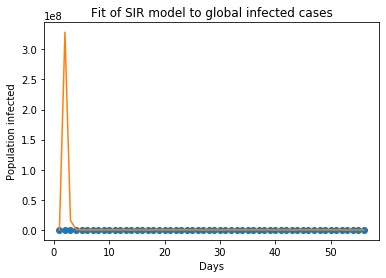

Optimal parameters: beta = 7.066672808139367  and gamma =  3.0242929862502668


In [351]:
temp = df_c[df_c['Country/Region'] == countries[2]]
popt, fitted = find_opt(temp, N)

In [352]:
# temp
popt, fitted

(array([7.06667281, 3.02429299]),
 array([ 1.10000000e+01,  3.28389625e+08,  1.59571672e+07,  7.75393214e+05,
         3.76780300e+04,  1.83085681e+03,  8.89652843e+01,  4.32301520e+00,
         2.10064681e-01,  1.02075006e-02,  4.96003500e-04,  2.41025064e-05,
         1.17114774e-06,  5.73820219e-08,  2.85454078e-09, -1.95368976e-10,
        -3.54761191e-10, -1.50566571e-10, -4.03470832e-11, -3.66985986e-11,
        -3.30501139e-11, -2.94016293e-11, -2.57531447e-11, -2.21046600e-11,
        -1.84561754e-11, -1.48076908e-11, -1.11592062e-11, -7.51072153e-12,
        -3.86223690e-12, -1.17699144e-12, -1.06896355e-12, -9.60935654e-13,
        -8.52907760e-13, -7.44879866e-13, -6.36851972e-13, -5.28824078e-13,
        -4.20796184e-13, -3.12768291e-13, -2.04740397e-13, -9.67125028e-14,
        -3.55766632e-14, -3.52480480e-14, -3.49194329e-14, -3.45908178e-14,
        -3.42622027e-14, -3.39335876e-14, -3.36049724e-14, -3.32763573e-14,
        -3.29477422e-14, -3.26191271e-14, -3.22905119e